In [1]:
import pandas as pd
import numpy as np

In [11]:
tp=pd.read_csv("Data/Chicago_taxi_trips2013.csv",usecols=['Taxi ID', 'Trip Start Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Community Area',
       "Pickup O'Hare Community Area", 'Dropoff Community Area',
       "Dropoff O'Hare Community Area", 'Fare', 'Tips', 'Tolls',
       'Trip Total', 'Pickup Centroid Location',
       'Dropoff Centroid  Location'])

/Users/arnavkundu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
tp["Trip Start Timestamp"]=pd.to_datetime(tp["Trip Start Timestamp"])
tp["hour"]=tp["Trip Start Timestamp"].dt.hour
tp["month"]=tp["Trip Start Timestamp"].dt.month
tp["dow"]=tp["Trip Start Timestamp"].dt.dayofweek
tp["wom"]=tp["Trip Start Timestamp"].dt.week
tp.head()

,Taxi ID,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Pickup O'Hare Community Area,Dropoff Community Area,Dropoff O'Hare Community Area,Fare,Tips,Tolls,Trip Total,Pickup Centroid Location,Dropoff Centroid Location,hour,month,dow,wom
0,8509241e33b2b6bf9aee9047a8d1ff3dfe7ce86db50691...,2013-06-09 00:45:00,540.0,2.50,8.0,0.0,8.0,0.0,$8.85,$0.00,$0.00,$10.35,POINT (-87.6499072264 41.9049353016),POINT (-87.6318639497 41.8920421365),0,6,6,23
1,144f6db98ba2bd667e131e37ed5b79fe44416ebe9337f5...,2013-09-14 00:30:00,900.0,3.90,6.0,0.0,22.0,0.0,$11.65,$0.00,$0.00,$13.65,POINT (-87.6568039088 41.9491397709),POINT (-87.6750951155 41.9160052737),0,9,5,37
2,30edf2adde06c5b5d365eced7cf4b5020255da2bc604f1...,2013-02-18 07:30:00,1500.0,16.40,6.0,0.0,56.0,0.0,$34.04,$5.00,$0.00,$41.04,POINT (-87.6559981815 41.9442266014),POINT (-87.7696154528 41.7925923603),7,2,0,8
3,5b0e845181646f6a7a9201c1edc9a7b0d4aa0fd14bf255...,2013-03-16 21:30:00,240.0,0.63,8.0,0.0,NaN,NaN,$5.05,$0.00,$0.00,$7.55,POINT (-87.6188683546 41.8909220259),NaN,21,3,5,11
4,2b96ddd6669548a38003cfad8f3e5373280257662377cb...,2013-06-14 16:30:00,300.0,9.10,32.0,0.0,8.0,0.0,$5.45,$2.00,$0.00,$8.95,POINT (-87.6327464887 41.8809944707),POINT (-87.6288741572 41.8920726347),16,6,4,24


In [40]:
tp[tp.columns[8:12]]=tp[tp.columns[8:12]].replace('[\$,]', '', regex=True).astype(float)

In [45]:
trips_by_taxi=tp[['month','hour','Fare','Trip Total','Tolls','Tips','Pickup Community Area','Dropoff Community Area','Trip Seconds']].groupby(['month','hour','Pickup Community Area','Dropoff Community Area']).agg({'Fare':'median','Trip Total':'median','Tolls':'median','Tips':'median','Trip Seconds':'median'})


In [46]:
trips_by_taxi.head(100)

Fare  Trip Total  \
month hour Pickup Community Area Dropoff Community Area                        
1     0    1.0                   1.0                       5.050       5.450   
                                 2.0                       6.350       6.850   
                                 3.0                       9.050      10.050   
                                 4.0                       9.950       9.950   
                                 5.0                      11.450      12.450   
                                 6.0                      13.550      15.700   
                                 7.0                      16.850      18.550   
                                 8.0                      18.750      19.850   
                                 14.0                     13.850      13.850   
                                 15.0                     19.250      19.250   
                                 16.0                     15.850      15.850   
                                 22.0                     20.750      20.750   
                                 24.0                     21.150      22.650   
                                 28.0                     24.150      27.275   
                                 32.0                     26.650      28.150   
                                 34.0                     27.450      27.450   
                                 77.0                      6.450       6.850   
           2.0                   1.0                       7.050       7.350   
                                 2.0                       3.650       4.550   
                                 3.0                      10.050      10.850   
                                 4.0                       7.350       7.350   
                                 5.0                       9.050       9.050   
                                 6.0                      16.050      16.050   
                                 7.0                      16.550      16.550   
                                 8.0                      21.650      25.250   
                                 13.0                    138.050     138.050   
                                 14.0                      8.050       8.050   
                                 16.0                     11.150      11.150   
                                 21.0                     85.850      85.850   
                                 22.0                     14.850      15.350   
...                                                          ...         ...   
           4.0                   8.0                      17.550      18.550   
                                 9.0                      21.450      21.450   
                                 10.0                     16.550      17.550   
                                 11.0                     15.850      15.850   
                                 12.0                     11.450      11.450   
                                 13.0                      6.750       7.250   
                                 14.0                      7.050       7.450   
                                 15.0                     10.650      13.400   
                                 16.0                      8.250       9.750   
                                 19.0                     13.450      13.450   
                                 21.0                      7.850       8.350   
                                 22.0                     11.650      12.350   
                                 24.0                     13.850      15.650   
                                 28.0                     18.650      18.650   
                                 31.0                     19.850      25.020   
                                 32.0                     18.745      21.950   
                                 41.0                     35.650      35.650   
                                 56.0                     40

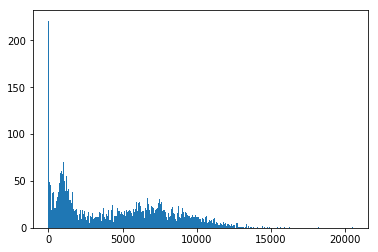

In [30]:
from matplotlib import pyplot as plt
plt.hist(trips_by_taxi['Trip Seconds'],bins=500)
plt.show()

In [49]:
trips_by_taxi.to_excel("Data/Trip_by_month_hour.xlsx")

In [54]:
new_df=trips_by_taxi.unstack(level=1)
new_df.head()

Fare                 \
hour                                                   0       1      2    
month Pickup Community Area Dropoff Community Area                         
1     1.0                   1.0                      5.05   4.950   5.05   
                            2.0                      6.35   6.050   6.45   
                            3.0                      9.05   9.445   9.55   
                            4.0                      9.95  11.250   7.65   
                            5.0                     11.45  15.250  11.15   

                                                                               \
hour                                                   3      4     5      6    
month Pickup Community Area Dropoff Community Area                              
1     1.0                   1.0                      5.05   5.25  4.45   3.45   
                            2.0                      6.65   6.65  6.25   6.05   
                            3.0                      8.85   8.65  8.85  10.65   
                            4.0                     10.45   8.45  7.35   8.45   
                            5.0                     12.85  11.85   NaN  14.45   

                                                                         \
hour                                                   7      8      9    
month Pickup Community Area Dropoff Community Area                        
1     1.0                   1.0                      3.75   3.25   3.75   
                            2.0                      5.45   6.45   5.85   
                            3.0                     11.05  10.65   9.55   
                            4.0                     11.65  11.75  10.95   
                            5.0                     16.05  15.25  13.55   

                                                     ...   Trip Seconds  \
hour                                                 ...             14   
month Pickup Community Area Dropoff Community Area   ...                  
1     1.0                   1.0                      ...           60.0   
                            2.0                      ...          510.0   
                            3.0                      ...          870.0   
                            4.0                      ...          720.0   
                            5.0                      ...            NaN   

                                                                            \
hour                                                    15      16      17   
month Pickup Community Area Dropoff Community Area                           
1     1.0                   1.0                       60.0    60.0     0.0   
                            2.0                      540.0   600.0   660.0   
                            3.0                      810.0   720.0   780.0   
                            4.0                     1020.0  1050.0   780.0   
                            5.0                      960.0  1110.0  1200.0   

                                                                           \
hour                                                    18      19     20   
month Pickup Community Area Dropoff Community Area                          
1     1.0                   1.0                       60.0   180.0   60.0   
                            2.0                      480.0   450.0  360.0   
                            3.0                      960.0   660.0  660.0   
                            4.0                      720.0   660.0  720.0   
                            5.0                     1230.0  1200.0  900.0   

                                                                           
hour                                                   21      22      23  
month Pickup Community Area Dropoff Community Area                         
1     1.0                   1.0                     120.0   240.0   210.0  
                            2.0                

In [56]:
trips_by_month_hour=tp[['month','hour','Fare','Trip Total','Trip Miles','Trip Seconds']].groupby(['month','hour']).agg({'Fare':'median','Trip Total':'median','Trip Seconds':'median','Trip Miles':'median'})
trips_by_month_hour.head()

Fare  Trip Total  Trip Seconds  Trip Miles
month hour                                            
1     0     7.85        9.05         480.0       0.600
      1     7.85        9.05         480.0       0.600
      2     7.85        9.25         480.0       0.400
      3     7.85        9.25         480.0       0.185
      4     8.05        9.25         420.0       0.100

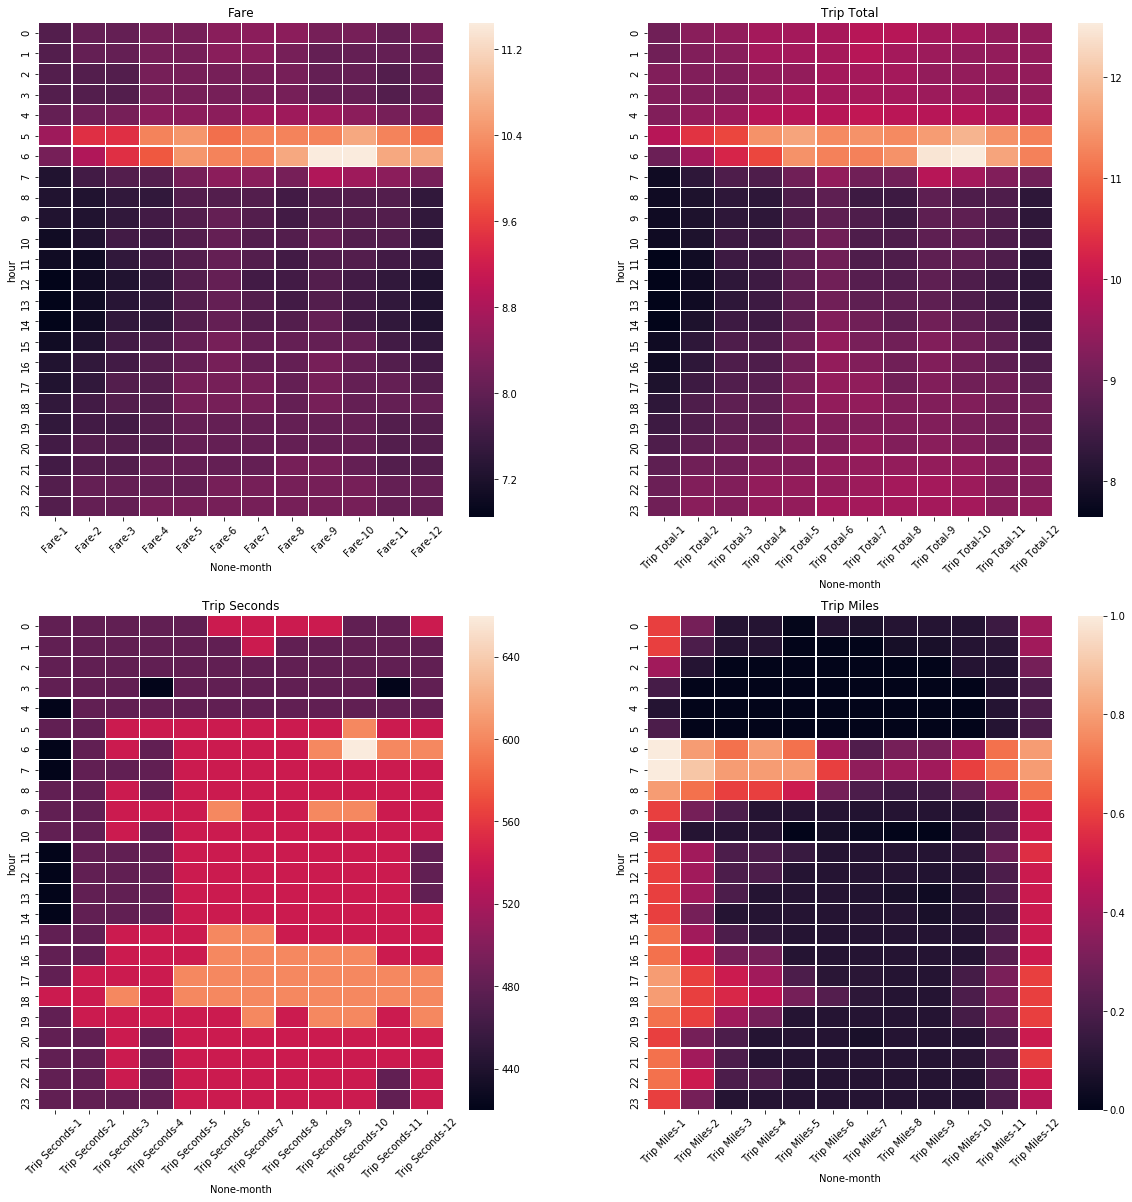

In [64]:
#plot_df=trips_by_month_hour[["Fare"]].unstack(-1)
import seaborn as sns
def plot_heatmap(df):
    cols=df.columns
    i=0
    fig=plt.figure(figsize=(20,20))
    n=len(cols)
    for col in cols:
        i+=1
        plot_df=trips_by_month_hour[[str(col)]].unstack(0)
        plt.subplot(2,2,i)
        ax = sns.heatmap(plot_df, linewidths=.2)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45 )
        plt.title(col)
        
plot_heatmap(trips_by_month_hour)

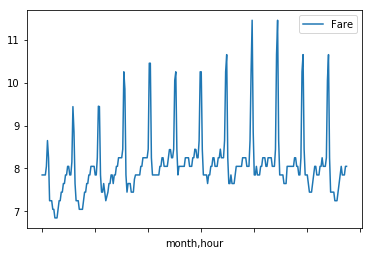

In [76]:
trips_by_month_hour[["Fare"]].plot()

In [68]:
trips_by_pick_drop=tp[['Pickup Community Area','Dropoff Community Area','Fare','Trip Total','Trip Miles','Trip Seconds']].groupby(['Pickup Community Area','Dropoff Community Area']).agg({'Fare':'median','Trip Total':'median','Trip Seconds':'median','Trip Miles':'median'})
trips_by_pick_drop.head(100)

Fare  Trip Total  Trip Seconds  \
Pickup Community Area Dropoff Community Area                                    
1.0                   1.0                      4.65       4.980         180.0   
                      2.0                      6.85       7.250         420.0   
                      3.0                      9.65      10.250         600.0   
                      4.0                     10.45      11.050         720.0   
                      5.0                     13.25      14.250         960.0   
                      6.0                     13.25      14.600         900.0   
                      7.0                     17.45      18.850        1080.0   
                      8.0                     20.25      21.650        1140.0   
                      9.0                     20.45      23.050        1500.0   
                      10.0                    21.65      22.450        1680.0   
                      11.0                    19.05      20.000        1500.0   
                      12.0                    14.65      15.250        1020.0   
                      13.0                    11.45      12.250         900.0   
                      14.0                    14.05      14.650        1080.0   
                      15.0                    22.25      22.850        1740.0   
                      16.0                    16.85      17.450        1320.0   
                      17.0                    26.65      28.050        2100.0   
                      18.0                    28.65      30.650        2070.0   
                      19.0                    25.35      26.850        2100.0   
                      20.0                    21.85      22.450        1830.0   
                      21.0                    18.25      19.250        1440.0   
                      22.0                    19.25      20.450        1530.0   
                      23.0                    24.15      25.695        2040.0   
                      24.0                    21.65      23.050        1560.0   
                      25.0                    36.85      38.650        2340.0   
                      26.0                    34.75      34.750        1770.0   
                      27.0                    31.65      32.550        1920.0   
                      28.0                    25.45      27.025        1560.0   
                      29.0                    31.35      34.775        2190.0   
                      30.0                    35.25      38.050        2040.0   
...                                             ...         ...           ...   
                      73.0                    49.25      49.250        2880.0   
                      74.0                    58.45      62.000        4200.0   
                      75.0                    53.25      54.500        2760.0   
                      76.0                    32.05      36.650        2160.0   
                      77.0                     6.65       7.050         360.0   
2.0                   1.0                      6.85       7.250         420.0   
                      2.0                      3.25       3.650           0.0   
                      3.0                     10.85      11.250         780.0   
                      4.0                      7.25       7.650         420.0   
                      5.0                     11.25      11.650         840.0   
                      6.0                     14.45      15.250        1080.0   
                      7.0                     17.85      18.640        1260.0   
                      8.0                     21.45      22.650        1320.0   
                      9.0                     18.15      18.150        1320.0   
                      10.0                    18.45      19.050        1320.0   
                      11.0                    14.65      14.850        1080.0   
                      12.0                    10.85      11.530         720.0 

                         Fare                                            \
Pickup Community Area    1.0    2.0    3.0    4.0    5.0    6.0    7.0    
Dropoff Community Area                                                    
1.0                      4.65   6.85  10.05  10.85  13.45  13.85  17.25   
2.0                      6.85   3.25  11.25   7.65  11.65  14.65  18.25   
3.0                      9.65  10.85   4.85   6.85   7.65   7.05  10.85   
4.0                     10.45   7.25   7.05   4.45   6.65   9.65  13.05   
5.0                     13.25  11.25   7.85   6.45   4.25   7.05   9.25   

                                             ...                         \
Pickup Community Area    8.0    9.0    10.0  ...     68.0   69.0   70.0   
Dropoff Community Area                       ...                          
1.0                     20.25  21.05  22.85  ...    38.25  36.65   0.00   
2.0                     22.05  17.85  17.35  ...    38.25  55.45  58.45   
3.0                     

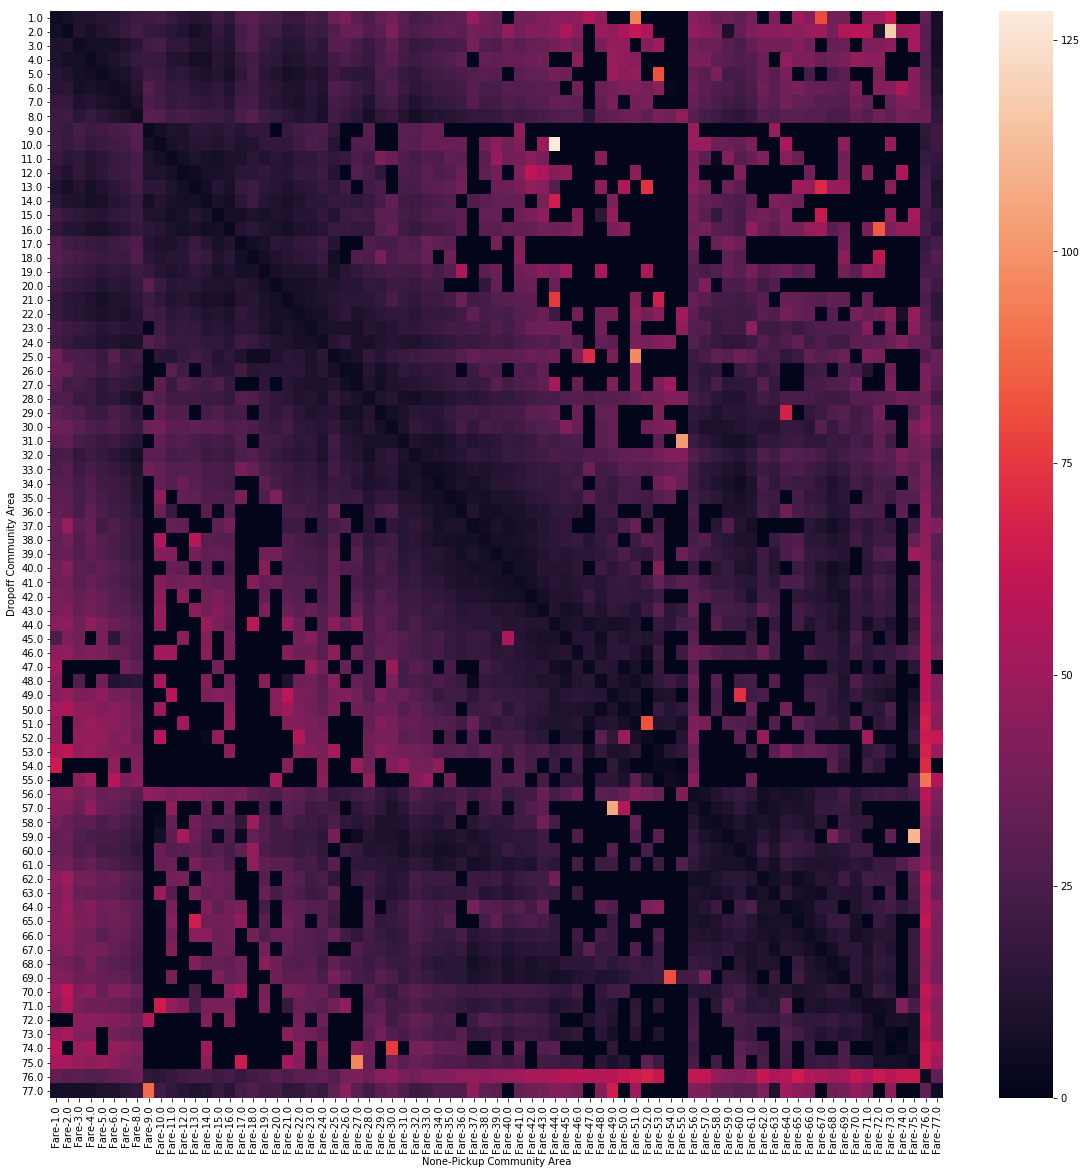

In [75]:
df_plt=trips_by_pick_drop[["Fare"]].unstack(0).fillna(0)
print(df_plt.head())
fig=plt.figure(figsize=(20,20))
sns.heatmap(df_plt)